In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col

spark = SparkSession.builder.appName('733').getOrCreate()
sc = spark.sparkContext

In [1]:
annual_df = spark.read.csv('../annual_compustat.csv', header=True) #.limit(20000)

In [3]:
misstatements = spark.read.csv('../misstatements.csv', header=True)

In [4]:
new_df = annual_df.join(misstatements, annual_df.tic == misstatements.ticker)

In [5]:
new_df.select('tic').distinct().count()

1095

In [10]:
rea_df = annual_df.select('rea')
rea_df = rea_df.filter(rea_df.rea.isNotNull())

In [63]:
df = rea_df.select(col('rea'), rea_df.rea.cast('float').alias('float_rea'))
rea_df = rea_df.where(rea_df.rea != 0)
rea_df.show()

+---------+
|      rea|
+---------+
|   2.7720|
|  -1.6560|
| -35.1880|
|  -1.4840|
|  17.6000|
|-158.8000|
|  69.8020|
| 115.7440|
|  -1.2810|
|  -1.9000|
|  -8.0390|
|   1.6850|
|  22.0970|
|  -2.5780|
|  -3.4550|
|  -3.1030|
|  -4.7740|
|   7.0120|
| -11.4510|
| -16.9130|
+---------+
only showing top 20 rows



In [65]:
data = df.select('float_rea').collect()

In [58]:
# percentage = float(raw_input('What percentage? '))
import random
import numpy

percentage = 5
k = len(data) * percentage // 100
indices = random.sample(range(len(data)), k)
new_list1 = [data[i] for i in indices]

In [59]:
len(new_list1)

576

In [67]:
new_list1[0]
rea_vector = [x[0] for x in new_list1]

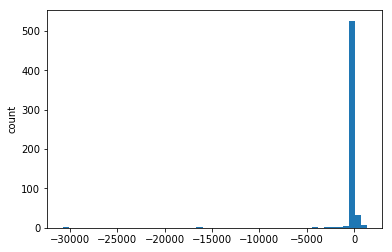

In [73]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline
# x = np.random.normal(size = 1000)
plt.hist(rea_vector, bins=50)
plt.ylabel('count');

In [74]:
annual_df.show()

+------+--------+-----+------+------+------+-------+-----+---------+--------------------+-------+-------+-------+----+------+------+----+------+-----+------+------+-------+-----+---+-----+----+----+-----+----+----+-----+----+---+--------+-----+-----+-----+----+----+------+-----+-------+------+------+-----+-------+-------+-----+--------+-------+--------+---------+------+-----+-------+-----+----+------+------+----+------+----+----+----+----+------+---------+---------+-------+---------+----+----+------+------+------+------+----+----+-----+----+------+----+-----+-------+----+-----+------+----+----+----+-----+-------+-----+-------+----+-----+----+-----+----+-----+----+----+----+------+-----+-----+----+-----+----+------+-----+----+-----+-----+-----+------+------+-------+----+----+-----+----+-------+-------+-------+----+-----+----+-----+----+----+----+----+------+------+-----+----+----+-------+------+-------+-----+-------+-----+-------+-------+----+----+----+----+----+----+----+----+----+----

In [76]:
# nullcounts = annual_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in annual_df.columns])

In [80]:
nullcounts = spark.read.csv('annual_compustat_null_count.csv', header=False)

In [81]:
nullcounts.show()

+---+---+---+---+---+---+---+---+---+---+----+----+------+------+----+----+------+------+----+-----+-----+------+----+----+-----+------+----+------+-----+------+----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+------+-----+------+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+-----+------+-----+------+------+------+------+------+------+------+------+------+---

In [82]:
import csv

with open('annual_compustat_null_count.csv', 'r') as f:
  reader = csv.reader(f)
  your_list = list(reader)

print(your_list)

[['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '818306', '810462', '0', '0', '698054', '702977', '0', '80675', '80675', '812004', '1677', '0', '33518', '817171', '0', '353427', '39341', '817725', '8', '717552', '746149', '773515', '299177', '454021', '705981', '213877', '267111', '714259', '303335', '784224', '749514', '746693', '748961', '746753', '784292', '179047', '186448', '810415', '810825', '810899', '784279', '809542', '820413', '820413', '820412', '165814', '784246', '804711', '804855', '804467', '174806', '138557', '177875', '727129', '741433', '742850', '743217', '773264', '741564', '742519', '773235', '743117', '741047', '144712', '80361', '625074', '661421', '776101', '105874', '72763', '720269', '55940', '163696', '715392', '802179', '651160', '651197', '182983', '144506', '131427', '817887', '339136', '241545', '817752', '744674', '738782', '809866', '810452', '810484', '809359', '65843', '612144', '133261', '134083', '96792', '92473', '129968', '524366', 

In [85]:
null_count_list = your_list[0]

In [91]:
null_count_list = [float(x) for x in null_count_list]

In [92]:
good_columns = []
for i in range(0, len(null_count_list)):
    if null_count_list[i]==0:
        good_columns.append(i)
    

In [93]:
good_columns

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 18, 23, 26, 599, 601, 602]

In [94]:
columns_num = [3, 10, 14]
df2 = annual_df.select(*(annual_df.columns[i] for i in good_columns))
df2.show()


+------+--------+-----+------+------+------+-------+-----+---------+--------------------+-------+-------+------+------+-----+---+----+------+-------+----+
| gvkey|datadate|fyear|indfmt|consol|popsrc|datafmt|  tic|    cusip|                conm|acctchg|acctstd|  ajex|   ajp|curcd|fyr| ogm|prstkc|prstkpc|prvt|
+------+--------+-----+------+------+------+-------+-----+---------+--------------------+-------+-------+------+------+-----+---+----+------+-------+----+
|001000|19611231| 1961|  INDL|     C|     D|    STD| AE.2|000032102|A & E PLASTIK PAK...|   null|   null|3.3418|1.0000|  USD| 12|null|  null|   null|null|
|001000|19621231| 1962|  INDL|     C|     D|    STD| AE.2|000032102|A & E PLASTIK PAK...|   null|   null|3.3418|1.0000|  USD| 12|null|  null|   null|null|
|001000|19631231| 1963|  INDL|     C|     D|    STD| AE.2|000032102|A & E PLASTIK PAK...|   null|   null|3.2445|1.0000|  USD| 12|null|  null|   null|null|
|001000|19641231| 1964|  INDL|     C|     D|    STD| AE.2|000032102|A 

In [95]:
df2.first()

Row(gvkey='001000', datadate='19611231', fyear='1961', indfmt='INDL', consol='C', popsrc='D', datafmt='STD', tic='AE.2', cusip='000032102', conm='A & E PLASTIK PAK INC', acctchg=None, acctstd=None, ajex='3.3418', ajp='1.0000', curcd='USD', fyr='12', ogm=None, prstkc=None, prstkpc=None, prvt=None)

NameError: name 'null' is not defined